In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv
/kaggle/input/brazilmap/brazil_map.jpg


## Data schema/model
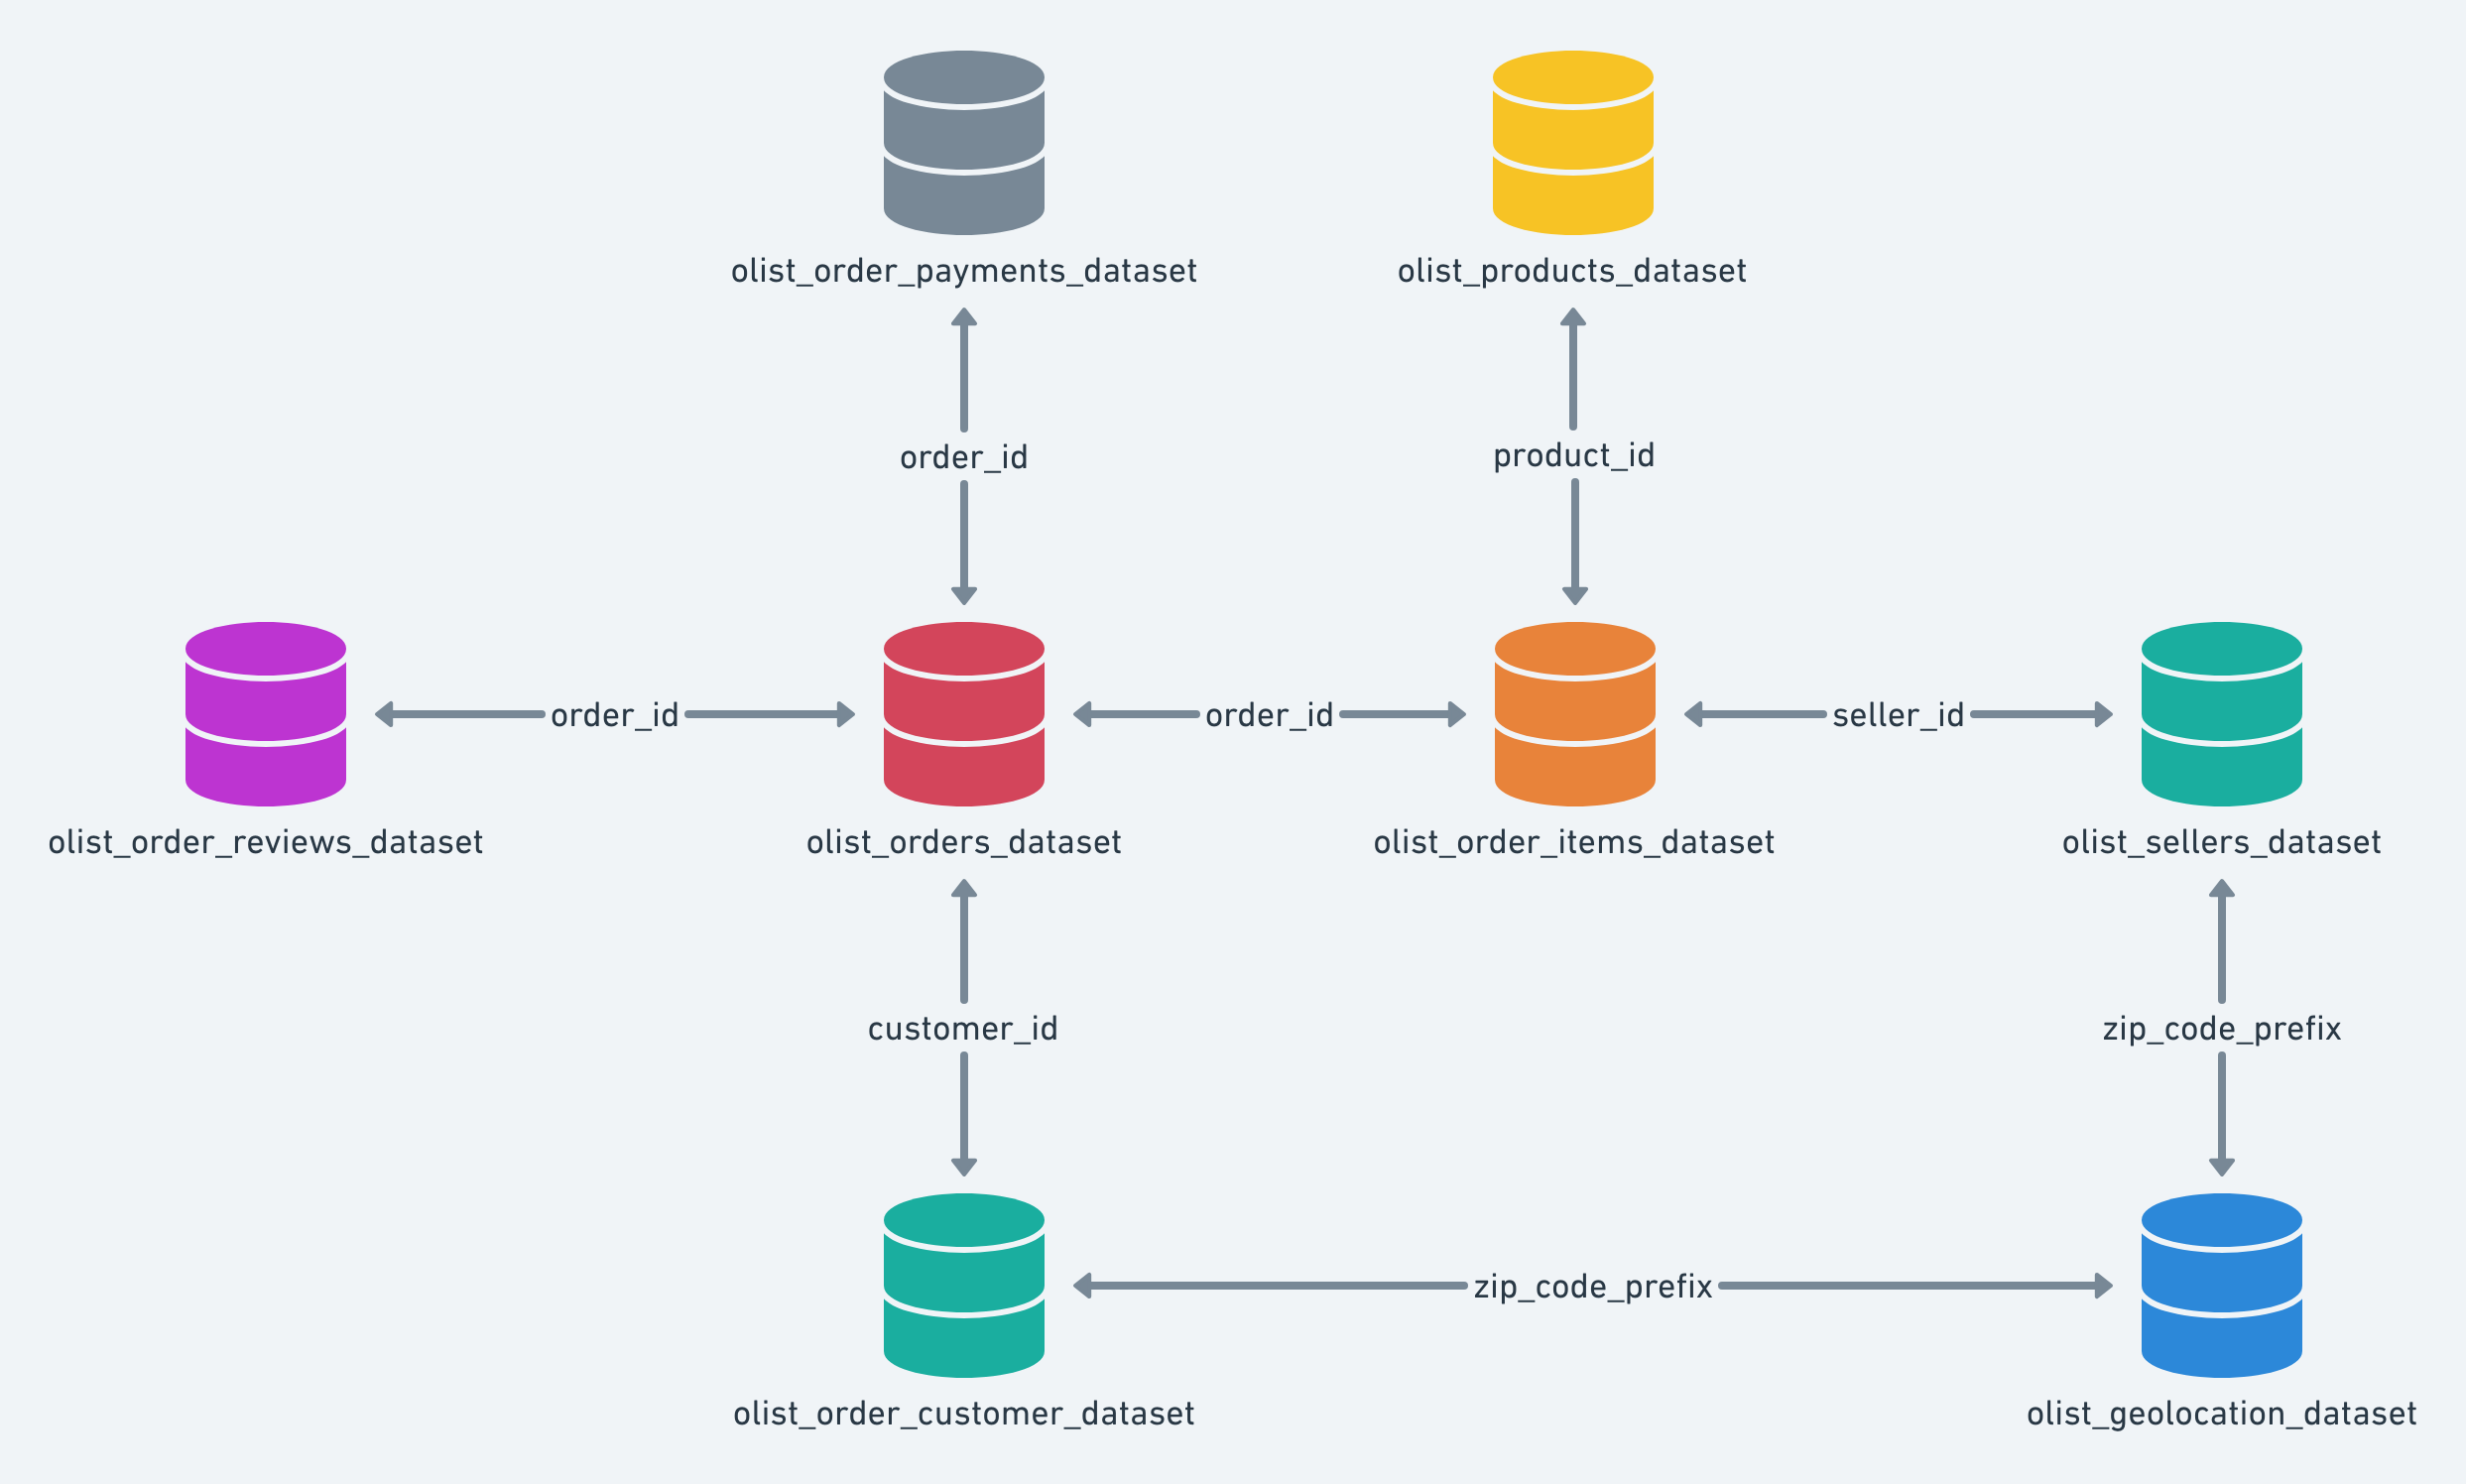

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# root_path = '../input/brazilian-ecommerce/'
root_path = ''

In [2]:
# linked with 'customer_id', 'zip_code_prefix'
customers = pd.read_csv(root_path + "olist_customers_dataset.csv")

# linked with 'order_id', 'customer_id'
# orders = pd.read_csv('../input/brazilian-ecommerce/olist_orders_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
# linked with 'order_id'
order_payments = pd.read_csv(root_path + "olist_order_payments_dataset.csv")
order_reviews = pd.read_csv(root_path + "olist_order_reviews_dataset.csv")

# linked with 'order_id', 'product_id', 'seller_id'
order_items = pd.read_csv(root_path + "olist_order_items_dataset.csv")

# linked with 'product_id'
products = pd.read_csv(root_path + "olist_products_dataset.csv")

# linked with 'customer_id', 'zip_code_prefix'
sellers = pd.read_csv(root_path + "olist_sellers_dataset.csv")

# linked with'zip_code_prefix'
geolocation = pd.read_csv(root_path + "olist_geolocation_dataset.csv")

# translations of product_category_name data
category_translation = pd.read_csv('product_category_name_translation.csv')

In [3]:
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
customers.groupby('customer_unique_id').size().sort_values(ascending=False)

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
                                    ..
5657dfebff5868c4dc7e8355fea865c4     1
5657596addb4d7b07b32cd330614bdf8     1
5656eb169546146caeab56c3ffc3d268     1
5656a8fabc8629ff96b2bc14f8c09a27     1
ffffd2657e2aad2907e67c3e9daecbeb     1
Length: 96096, dtype: int64

In [7]:
category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [10]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [11]:
order_payments.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [12]:
order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [13]:
products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [14]:
geolocation.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
89054,4375,-23.656257,-46.658401,sao paulo,SP
124669,5374,-23.577953,-46.758150,são paulo,SP
233717,9660,-23.654308,-46.594998,sao bernardo do campo,SP
972409,95748,-29.494865,-51.490256,sao jose do sul,RS
290801,13150,-22.637281,-47.201751,cosmopolis,SP


In [15]:
geolocation.isna().mean()

geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

In [16]:
geolocation['geolocation_city'].unique()

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

In [17]:
import unidecode
def to_clean_string(column):
    space = ' '.join(column.split())
    return unidecode.unidecode(space.lower())
geolocation['geolocation_city'] = geolocation['geolocation_city'].apply(to_clean_string)

In [18]:
geolocation['geolocation_city'].unique()

array(['sao paulo', 'sao bernardo do campo', 'jundiai', ...,
       'floriano peixoto', 'erebango', 'santa cecilia do sul'],
      dtype=object)

In [19]:
geolocation.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
20056       1
76370       1
63012       1
76372       1
32635       1
Length: 19015, dtype: int64

In [20]:
other_state_geolocation = geolocation.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = geolocation.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [21]:
geolocation_cleaned = geolocation.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_cleaned = geolocation_cleaned.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [22]:
customers_location = customers.merge(geolocation_cleaned,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

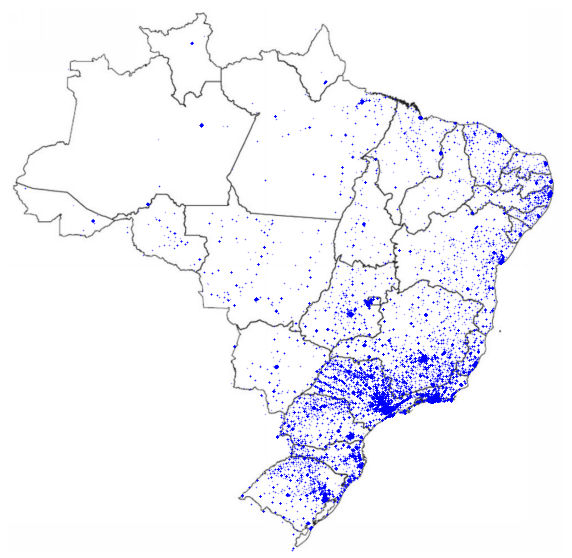

In [23]:
import urllib
import matplotlib.image as mpimg

def viz_orders_map(data):
    #brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    brazil=mpimg.imread(("/kaggle/input/brazilmap/brazil_map.jpg"),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='blue')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()
    
viz_orders_map(customers_location.drop_duplicates(subset='customer_unique_id'))

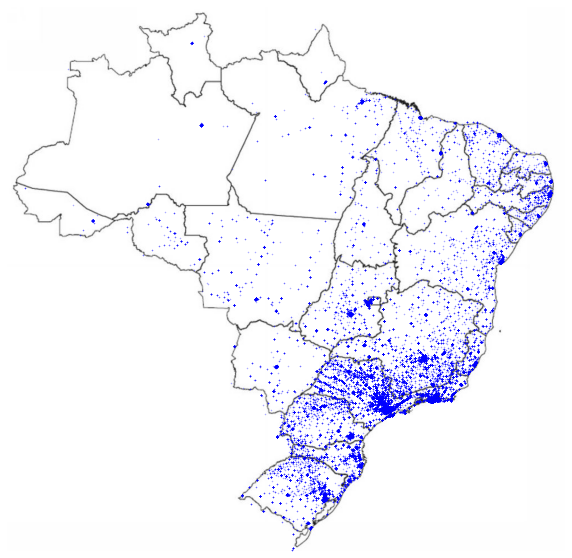

### ORDERS

In [24]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [25]:
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
39299,595316a07cd3dea9db7adfcc7e247ae7,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-08-18 04:26:04,39.00,9.27
78534,b2a55ef9c0ebd8b6d955fdffa15e7bfa,1,4328139cbe9adde0aac493ca9871eab3,8160255418d5aaa7dbdc9f4c64ebda44,2018-04-25 02:51:37,72.90,14.60
17698,2897ea74f9139bdcd87a8d18548af8e2,1,a1f1aaa22f634ff796e9acad925c346d,4978a02ea9c8be7a9b5480680f40334e,2018-07-10 13:12:02,491.99,44.31
32725,4a2c053de460d64372361385b38bdb24,2,bce3aa01b13b6e00307669191f690955,213b25e6f54661939f11710a6fddb871,2018-08-01 16:05:16,119.85,21.69
52859,784b0448b2075a95afcf2a55310b7238,1,1da0fbb35cfdc9fcb6d48dfddca69513,e88165a185134e13fdfc85d4fa654db8,2018-05-24 01:31:53,18.00,8.29


In [26]:
# certaines commandes contiennent bien sûr plusieurs produits

order_items.groupby('order_id').size().sort_values(ascending=False)

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Length: 98666, dtype: int64

In [27]:
order_items_aggregated = order_items.groupby('order_id').agg({'price':sum,'freight_value':sum,'shipping_limit_date':max }).reset_index()

<AxesSubplot:xlabel='price', ylabel='freight_value'>

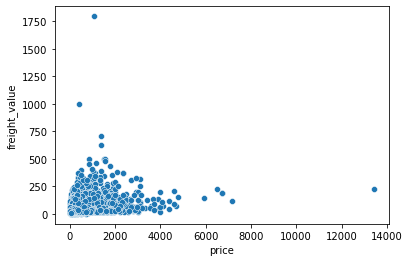

In [28]:
import seaborn as sns
sns.scatterplot(x='price',y='freight_value',data=order_items_aggregated)

In [29]:
order_items_aggregated.describe()

,price,freight_value
count,98666.000000,98666.000000
mean,137.754076,22.823562
std,210.645145,21.650909
min,0.850000,0.000000
25%,45.900000,13.850000
50%,86.900000,17.170000
75%,149.900000,24.040000
max,13440.000000,1794.960000


In [30]:
percentil_freight_value = order_items_aggregated['freight_value'].quantile(0.99)
order_items_aggregated = order_items_aggregated[(order_items_aggregated['price'] <= 5000) & (order_items_aggregated['freight_value'] <= percentil_freight_value)]

In [31]:
order_items_aggregated.describe()

,price,freight_value
count,97679.000000,97679.000000
mean,132.046700,21.423227
std,185.015685,14.133667
min,0.850000,0.000000
25%,45.900000,13.790000
50%,85.000000,17.070000
75%,149.900000,23.700000
max,4690.000000,104.980000


<AxesSubplot:xlabel='price', ylabel='freight_value'>

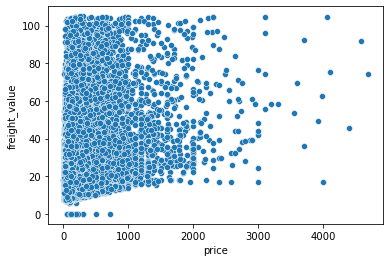

In [32]:
sns.scatterplot(x='price',y='freight_value',data=order_items_aggregated)

In [33]:
order_items_aggregated

,order_id,price,freight_value,shipping_limit_date
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,2017-09-19 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,2017-05-03 11:05:13
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,2018-01-18 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,2018-08-15 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,2017-02-13 13:57:51
...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41,2018-05-02 04:11:01
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,2018-07-20 04:31:48
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95,2017-10-30 17:14:25
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72,2017-08-21 00:04:32


In [34]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [35]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [36]:
columns_time = ['order_purchase_timestamp','order_approved_at',
                     'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in columns_time:
    orders[column] = pd.to_datetime(orders[column])

In [37]:
orders['diff_delivery_days'] = (orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']).dt.days

In [38]:
orders['diff_delivery_days'].describe()

count    96476.000000
mean        10.876881
std         10.183854
min       -189.000000
25%          6.000000
50%         11.000000
75%         16.000000
max        146.000000
Name: diff_delivery_days, dtype: float64

In [39]:
orders.groupby(orders['diff_delivery_days'] < 0).size()

diff_delivery_days
False    91614
True      7827
dtype: int64

In [40]:
orders[(orders['diff_delivery_days'] > min(orders['diff_delivery_days'])) & (orders['diff_delivery_days'] < max(orders['diff_delivery_days'])) ]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diff_delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,10.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,5.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,20.0


In [41]:
orders['diff_delivery_days'].describe()

count    96476.000000
mean        10.876881
std         10.183854
min       -189.000000
25%          6.000000
50%         11.000000
75%         16.000000
max        146.000000
Name: diff_delivery_days, dtype: float64

In [42]:
orders_cleaned = orders.merge(order_items_aggregated,on='order_id',how='inner')

In [43]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_ts_decompose(decompose,figsize=(12,8)):
    fig, ax = plt.subplots(4,1,figsize=figsize)
    sns.lineplot(data=decompose.observed,x=decompose.observed.index,y=decompose.observed,ax=ax[0])
    sns.lineplot(data=decompose.trend,x=decompose.trend.index,y=decompose.trend,ax=ax[1])
    sns.lineplot(data=decompose.seasonal,x=decompose.seasonal.index,y=decompose.seasonal,ax=ax[2])
    sns.lineplot(data=decompose.resid,x=decompose.resid.index,y=decompose.resid,ax=ax[3])
    plt.tight_layout()

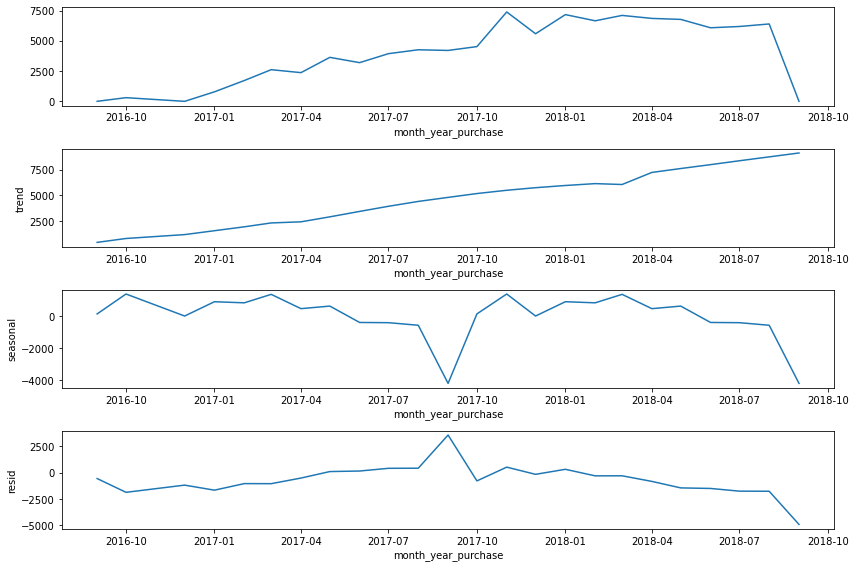

In [44]:
orders_cleaned['month_year_purchase'] = orders_cleaned['order_purchase_timestamp'].dt.to_period('M')
order_purchase_timestamp = orders_cleaned.groupby('month_year_purchase').size()
order_purchase_timestamp.index = order_purchase_timestamp.index.astype('datetime64[ns]')

decompose = seasonal_decompose(order_purchase_timestamp,model='additive',period=12, extrapolate_trend=12)
plot_ts_decompose(decompose)

In [45]:
import datetime
orders_w_customers = customers.merge(orders_cleaned, on='customer_id', how='inner')
max_date = max(orders_w_customers['order_purchase_timestamp']) + datetime.timedelta(days=1)

In [46]:
rfm_df = orders_w_customers.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (max_date - x.max()).days,
    'customer_id':'count',
    'price':'sum'
}).reset_index()
rfm_df.columns =['customer_id','recency','frequency','monetary']

In [47]:
rfm_df

,customer_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00
...,...,...,...,...
94483,fffcc512b7dfecaffd80f13614af1d16,146,1,688.00
94484,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89
94485,ffff371b4d645b6ecea244b27531430a,573,1,89.90
94486,ffff5962728ec6157033ef9805bacc48,124,1,115.00


count    94488.000000
mean       136.506113
std        190.946953
min          0.850000
25%         47.000000
50%         89.000000
75%        150.000000
max       4690.000000
Name: monetary, dtype: float64


<AxesSubplot:xlabel='monetary', ylabel='Count'>

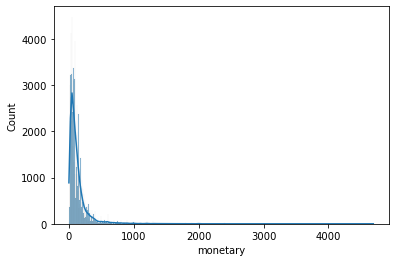

In [48]:
print(rfm_df['monetary'].describe())
sns.histplot(x='monetary', data=rfm_df, kde=True)

<AxesSubplot:xlabel='recency', ylabel='Count'>

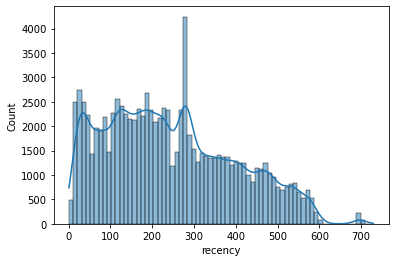

In [49]:
sns.histplot(x='recency', data=rfm_df, kde=True)

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def k_means_group(data, n_clusters, random_state, asc=False, log_transf=False, standard_tranf=False):
    
    data_temp = data.copy()
    if log_transf:
        data_temp = np.log(data_temp) + 1
        
    if standard_tranf:
        scaler = StandardScaler()
        scaler = scaler.fit(data_temp)
        data_temp = scaler.transform(data_temp)
        
    kmeans_sel = KMeans(n_clusters=n_clusters, random_state=random_state).fit(data_temp)
    
    cluster_group = data.assign(cluster = kmeans_sel.labels_)
    
    mean_group = cluster_group.groupby('cluster').mean().reset_index()
    mean_group = mean_group.sort_values(by=mean_group.columns[1],ascending=asc)
    mean_group['cluster_set'] = [i for i in range(n_clusters, 0, -1) ]
    
    cluster_map = mean_group.set_index('cluster').to_dict()['cluster_set']
    
    return cluster_group['cluster'].map(cluster_map)

In [51]:
r_labels = k_means_group(rfm_df[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_df[['frequency']],6,1)
m_labels = k_means_group(rfm_df[['monetary']],6,1)

rfm_df = rfm_df.assign(R = r_labels, F = f_labels, M = m_labels) 

In [52]:
rfm_df['R'] = rfm_df['R'] - 1
rfm_df['R'] = rfm_df['F'] - 1
rfm_df['R'] = rfm_df['M'] - 1

In [53]:
rfm_df.groupby('R')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
R,,,,,,,,
0,55396.0,246.577370,153.801551,5.0,122.0,229.0,357.0,729.0
1,27899.0,236.762214,150.793461,5.0,117.0,215.0,341.0,718.0
2,7921.0,249.164121,154.831445,1.0,124.0,230.0,355.0,699.0
3,2383.0,243.666807,155.642375,6.0,118.0,219.0,347.0,699.0
4,709.0,249.571227,153.109870,9.0,124.0,235.0,364.0,698.0
5,180.0,249.722222,178.185393,9.0,95.0,212.0,439.5,584.0


In [ ]:
rfm_df.groupby('F')['frequency'].describe()

In [ ]:
def get_segments(data):
    mean_fm = (data['F'] + data['M']) / 2
    
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 4 and mean_fm <= 5):
        return 'Champions'
    if (data['R'] >= 2 and data['R'] <= 5) and (mean_fm >= 3 and mean_fm <= 5):
        return 'Loyals'
    if (data['R'] >= 3 and data['R'] <= 5) and (mean_fm >= 1 and mean_fm <= 3):
        return 'Potentiellement loyals'
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 0 and mean_fm <= 1):
        return 'Nouveaux Clients'
    if (data['R'] >= 3 and data['R'] <= 4) and (mean_fm >= 0 and mean_fm <= 1):
        return 'Prometteurs'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 2 and mean_fm <= 3):
        return "Besoin d'attention"
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 0 and mean_fm <= 2):
        return 'About to Sleep'
    if (data['R'] >= 0 and data['R'] <= 2) and (mean_fm >= 2 and mean_fm <= 5):
        return 'à risque'
    if (data['R'] >= 0 and data['R'] <= 1) and (mean_fm >= 4 and mean_fm <= 5):
        return "Can't Lose Then"
    if (data['R'] >= 1 and data['R'] <= 2) and (mean_fm >= 1 and mean_fm <= 2):
        return 'Dormant'
    return 'Perdus'

In [ ]:
rfm_df['segment'] = rfm_df.apply(get_segments,axis=1)


In [ ]:
plt.figure(figsize=(10,5))
percentage = (rfm_df['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="GnBu_d")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
plt.show()

In [ ]:
#TODO:
# uniformmiser les noms de villes
# visualiser sur la carte du brésil
# 

In [ ]:
 # KMEANS

In [ ]:
rfm_df

In [ ]:
rfm_df=rfm_df.drop("customer_id", axis=1).drop("segment", axis=1).drop("R", axis=1).drop("F", axis=1).drop("M", axis=1)

In [ ]:
rfm_df

In [ ]:
for c in rfm_df.columns[2:]:
    rfm_df[c] = np.log(rfm_df[c])


scaler = StandardScaler()
# scaler.fit(rfm_df.drop("customer_id", axis=1).drop("segment", axis=1))
scaler.fit(rfm_df)

RFM_Table_scaled = scaler.transform(rfm_df)
# Put data into a df
# RFM_Table_scaled = pd.DataFrame(RFM_Table_scaled, columns=rfm_df.columns[1:])

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(RFM_Table_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(9,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Train the model on 4 clusters
kmean_model = KMeans(n_clusters=4, random_state=5)
kmean_y = kmean_model.fit_predict(RFM_Table_scaled)
# Add labels to df
rfm_df['Cluster'] = kmean_model.labels_

In [ ]:
# Function to visualize clusters
def rfm_values(df):
    df_new = df.groupby(['Cluster']).agg({
            'recency': 'mean',
            'frequency': 'mean',
            'monetary': ['mean', 'count']
        }).round(0)

    return df_new

rfm_values(rfm_df)


###### Que représente chaque cluster ?

- 0 : ce groupe peut être interprété comme (relativement nouveaux arrivants/faibles dépenses) car leurs dépenses sont les plus faibles de tous les groupes, mais ont la récence la plus faible. Ce cluster est assez énorme. Ainsi, un effort de marketing pourrait être conseillé à son égard afin d'augmenter sa valeur monétaire.

- 1 : peut être considéré comme notre meilleur (clients fidèles) car bien que les clients de ce groupe n'aient pas commandé en moyenne depuis un certain temps, leur fréquence de commandes est supérieure à tous les autres groupes et la valeur de leurs commandes est assez élevée.

- 3 : (Perdu/Faibles dépenses) est le nom que nous pouvons donner à ce cluster. Les clients de ce groupe semblent avoir l'une des récences les plus élevées et leur valeur monétaire est faible. Ce cluster ne devrait pas faire l'objet d'efforts marketing.

- 4 : Il s'agit de notre deuxième meilleur groupe (grands dépensiers) car sa récence vient en deuxième position et le montant moyen dépensé est le plus élevé. Ce cluster est également le deuxième en nombre de clients.

In [ ]:
# DBSCAN HDBSCAN 
# AgglomerativeClustering 


# moyenne: 

# nombre de prosuite achetes
# review score
# poids du colis
# temps de livraison 
# dépenses (montant)





In [ ]:
rfm_df2 = orders_w_customers.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (max_date - x.max()).days,
    'customer_id':'count',
    'price':'sum'   
}).reset_index()
rfm_df2.columns =['customer_id','recency','frequency','monetary']

In [ ]:
rfm_df2['order_price_average']= rfm_df2['monetary']/rfm_df2['frequency']

In [ ]:
orders_w_customers.columns

In [ ]:
orders_w_customers.shape

In [ ]:
rfm_df2.shape

In [ ]:
# orders_w_customers = customers.merge(orders_cleaned, on='customer_id', how='inner')

In [ ]:
orders_cleaned.columns

In [ ]:
orders_w_items = customers.merge(orders_cleaned, on='order_id', how='inner')